In [ ]:
print("안녕 코랩")

안녕 코랩


In [ ]:
print("두번째부터는 빠르다")

두번째부터는 빠르다


In [ ]:
import pandas as pd
import numpy as np

# Play Tennis data로 Decision Tree 실습

In [ ]:
pd.read_csv('/content/drive/MyDrive/2022새싹/playtennis.csv')

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
tennis_data = pd.read_csv('/content/drive/MyDrive/2022새싹/playtennis.csv')

In [ ]:
tennis_data.outlook.replace("sunny",0, inplace=True)
tennis_data

,outlook,temp,humidity,windy,play
0,0,hot,high,False,no
1,0,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,0,mild,high,False,no
8,0,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
tennis_data.outlook = tennis_data.outlook.replace("overcast", 1)
tennis_data.outlook = tennis_data.outlook.replace("rainy", 2)

In [ ]:
tennis_data

,outlook,temp,humidity,windy,play
0,0,hot,high,False,no
1,0,hot,high,True,no
2,1,hot,high,False,yes
3,2,mild,high,False,yes
4,2,cool,normal,False,yes
5,2,cool,normal,True,no
6,1,cool,normal,True,yes
7,0,mild,high,False,no
8,0,cool,normal,False,yes
9,2,mild,normal,False,yes


In [ ]:
tennis_data.temp.replace('hot', 1, inplace=True)
tennis_data.temp.replace('mild', 2, inplace=True)
tennis_data.temp.replace('cool', 3, inplace=True)

In [ ]:
tennis_data.humidity.replace('high', 1, inplace=True)
tennis_data.humidity.replace('normal', 2, inplace=True)

In [ ]:
tennis_data.windy = tennis_data.windy.replace(True, 1)

In [ ]:
tennis_data

,outlook,temp,humidity,windy,play
0,0,1,1,0.0,no
1,0,1,1,1.0,no
2,1,1,1,0.0,yes
3,2,2,1,0.0,yes
4,2,3,2,0.0,yes
5,2,3,2,1.0,no
6,1,3,2,1.0,yes
7,0,2,1,0.0,no
8,0,3,2,0.0,yes
9,2,2,2,0.0,yes


In [ ]:
tennis_data.play.replace('no', 1, inplace=True)
tennis_data.play.replace('yes', 2, inplace=True)
tennis_data

,outlook,temp,humidity,windy,play
0,0,1,1,0.0,1
1,0,1,1,1.0,1
2,1,1,1,0.0,2
3,2,2,1,0.0,2
4,2,3,2,0.0,2
5,2,3,2,1.0,1
6,1,3,2,1.0,2
7,0,2,1,0.0,1
8,0,3,2,0.0,2
9,2,2,2,0.0,2


In [ ]:
X = tennis_data.loc[:,'outlook':'windy'] # 독립변수만 X에 저장
X

,outlook,temp,humidity,windy
0,0,1,1,0.0
1,0,1,1,1.0
2,1,1,1,0.0
3,2,2,1,0.0
4,2,3,2,0.0
5,2,3,2,1.0
6,1,3,2,1.0
7,0,2,1,0.0
8,0,3,2,0.0
9,2,2,2,0.0


In [ ]:
y = tennis_data['play'] # 종속변수만 y에 저장
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: play, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
future = pd.DataFrame(
    data={'outlook':0, 'temp':1, 'humidity':2, 'windy':1},
    index=[0]
    )
future # sunny, hot, normal, windy

,outlook,temp,humidity,windy
0,0,1,2,1


In [ ]:
dt_clf.predict(future) # play = yes

array([2])

In [ ]:
X

,outlook,temp,humidity,windy
0,0,1,1,0.0
1,0,1,1,1.0
2,1,1,1,0.0
3,2,2,1,0.0
4,2,3,2,0.0
5,2,3,2,1.0
6,1,3,2,1.0
7,0,2,1,0.0
8,0,3,2,0.0
9,2,2,2,0.0


In [ ]:
dt_clf.predict(X)

array([1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1])

In [ ]:
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: play, dtype: int64

In [ ]:
dt_clf.predict(X) == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

In [ ]:
np.sum(dt_clf.predict(X) == y)

14

In [ ]:
len(y)

14

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y, dt_clf.predict(X)) # DT 정확도는 무조건 100%

1.0

## DT 시각화

In [ ]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import os

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['Play_No','Play_Yes'],
                                  filled=True, rounded=True,
                                  special_characters=True)

In [ ]:
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<humidity &le; 1.5<br/>gini = 0.459<br/>samples = 14<br/>value = [5, 9]<br/>class = Play_Yes>, fillcolor="#a7d3f3"] ;\n1 [label=<outlook &le; 0.5<br/>gini = 0.49<br/>samples = 7<br/>value = [4, 3]<br/>class = Play_No>, fillcolor="#f8e0ce"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = Play_No>, fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label=<windy &le; 0.5<br/>gini = 0.375<br/>samples = 4<br/>value = [1, 3]<br/>class = Play_Yes>, fillcolor="#7bbeee"] ;\n1 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = Play_Yes>, fillcolor="#399de5"] ;\n3 -> 4 ;\n5 [label=<outlook &le; 1.5<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = Play_No>, fillcolor="#ffffff"] ;\n3 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]<br/>cla

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

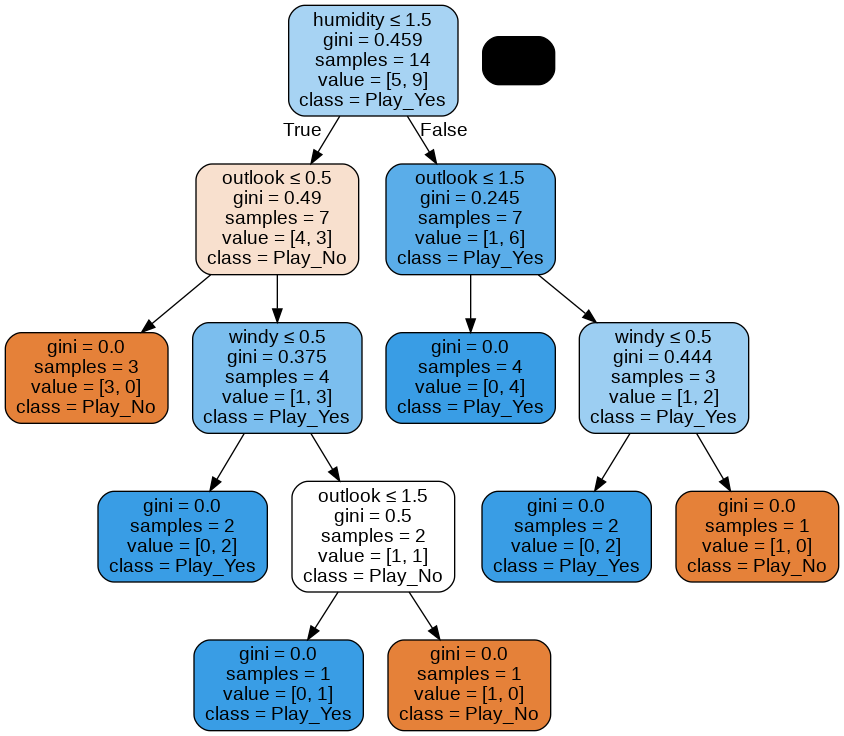

In [ ]:
Image(dt_graph.create_png()) # 지니=불순도. 지니지수 낮을수록 잘 분류된 것

In [ ]:
# sunny의 지니 지수(Gini Index) 계산
1 - ((3/5)**2 + (2/5)**2)

0.48